# <span style="color:#0b486b">SIT 112 - Data Science Concepts - Assignment 1</span>

---
Lecturer: Sergiy Shelyag | sergiy.shelyag@deakin.edu.au<br />

School of Information Technology, <br />
Deakin University, VIC 3215, Australia.

### <span style="color:#0b486b">Due: 8pm, Friday 16th April 2021</span>

---

### <span style="color:#0b486b">Instructions</span>

This notebook has been prepared for you to complete Assignment 1. Some sections have been pre-filled  to help you get started. **The total mark for this programming task is 65**.

1. Before you start, read the entire notebook carefully to understand what you need to do. You should also refer to the main instructions in *Assignment1_instructions.pdf*  to know what else you need to complete for this assignment.
2. For each cell marked with *#INSERT YOUR CODE HERE*, you must write your own code in this cell.
3. For each cell marked with *#INSERT YOUR COMMENT HERE*, you must write your own explanatory comment in this cell.
4. At the end, you must run the entire notebook and submit two files:
 1. The source of your solution notebook: [YourID]_assignment1_solution.ipynb
 2. And an exported version of your output: [YourID]_assignment1_output.html  
       
For example, if your student ID is 123456, then you need submit two files:

1. **123456_assignment1_solution.ipynb**
2. and **123456_assignment1_output.html**

As you go through this notebook:

* markdown cells marked with **Note** mean description sections.
* markdown cells marked with **Instructions** mean the instructions given to you to complete the sections.

***If an instruction is not clear, please contact the unit chair or the teaching team as soon as possible.***


In [105]:
#
# Import packages needed for processing
#
   # import the numpy package
import numpy as np
import csv           # this package needed for processing csv file
from collections import Counter  # this is for dictionary construction with counting functionality
import matplotlib.pyplot as plt  # this is for plotting and other descriptive statistics
import datetime      # this package is for handling time
#
# If you need add any additional packages, then add them below this line
#

import pandas as pd
import seaborn as sns
import re
%matplotlib inline

**Note**: you must place your data file in the same folder with your python notebook.

In [3]:
# Declare the path to the data file
DATA_FILE = "owid-covid-data.csv"
df = pd.read_csv("C://Users/anurag/Documents/Data Science/Assignment_1/owid-covid-data.csv")

**Note**. The following segment of codes is to load the data from the .csv file using csv package. It has been provided for you to get started. Please **do not** change this piece of code as well the variable names as we will need these variables to complete subsequent tasks. 

In [76]:
# Load CSV file using DictReader
input_file = csv.DictReader(open(DATA_FILE))
fieldnames = input_file.fieldnames
data_dict = {fn: [] for fn in fieldnames}
print(data_dict.keys())
for line in input_file:
    for k, v in line.items():
        if (v == ''): #quick fix for missing values
            v=0
        try:
            data_dict[k].append(int(v))
        except ValueError:
            try:
                data_dict[k].append(float(v))
            except ValueError:
                data_dict[k].append(v)
                
for k, v in data_dict.items():
    data_dict[k] = np.array(v)

dict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'new_vaccinatio

NameError: name 'np' is not defined

---
## **Instruction 1**
We first examine the variables and the overall data size. The tasks:

1. Write your code to print the type for the following variables (**4 marks**):
    * input_file
    * data_dict
    * data_dict['iso_code']
    * data_dict['reproduction_rate']


2. Write your code to print out the number of data records (**1 mark**):

[**Total mark: 5**]

In [103]:
# INSERT YOUR CODE HERE
#
#1. Write you code to print the type for the following variables:
#    * input_file
#    * data_dict
#    * data_dict['iso_code']
#    * data_dict['reproduction_rate']
#

a=type(input_file)
b=type(data_dict)
c=type(data_dict["iso_code"])
d=type(data_dict["reproduction_rate"])

print(a)
print(b)
print(c)
print(d)

<class 'csv.DictReader'>
<class 'dict'>
<class 'list'>
<class 'list'>


In [102]:
len(df)

74866

---
## Instruction 2
The following code segment is designed to calculate some basic statistics from the data for a recent date. The data is stored in **data_filtered_by_date** dictionary.

**Your task:**
1. Learn how the code, which extracts the data for all countries at a required date, works. Why **try-except** construction is required in this code? Provide the answer. (**2 marks**)
1. Write your code to find and print the minimum and the maximum values of mortality per million in the **total_deaths_per_million** column. (**1 mark**)
2. Write your code to find and print the minimum and the maximum values of cases per million in the **total_cases_per_million** column. (**1 mark**)
3. Write your code to find and print the mean and median mortality per million, and the standard deviation from the **total_deaths_per_million** column. (**2 marks**)
4. Write your code to construct a box plot for the **total_deaths_per_million**. (**2 marks**) 
4. You will find that mean and median values for mortality are quite different. Briefly describe the meaning of the difference between the mean and median mortality per million. Why are they different? (**2 marks**)

**[Total mark: 10]**

In [79]:
# THIS PART EXTRACTS THE DATA FOR ALL COUNTRIES AT A REQUIRED DATE.
# LEARN HOW IT WORKS.
# data_filtered_by_date DICTIONARY CONTAINS ALL DATA FOR ALL COUNTRIES AT required_date

required_date = '2021-03-09'

index_for_date = (data_dict['date'] == required_date)
data_filtered_by_date = {}
for key in data_dict.keys():
    try:
        data_filtered_by_date[key] = np.float_(data_dict[key][index_for_date])
    except:
        data_filtered_by_date[key] = data_dict[key][index_for_date]

In [ ]:
# 1. Why **try-except** construction is required in this code? (2 marks)


#The try-except code is required because the code under "try" is code that is raising an error. 
#The code under "except" handles that error.

#There is a for loop above the try-except construction. Under "try", it tries to go through the values in the data_filtered_by_date_list.
#It then tries to turn the value of the key of the index_for_date to a float value. This is the error.
#The except method corrects this, handling the error that is "np.float". This gets removed under "except".

In [106]:
#QUESTION 2

a = df["total_deaths_per_million"].min()
b = df["total_deaths_per_million"].max()

print(a)
print(b)

0.001
2268.843


In [86]:
#QUESTION 3

a=df["total_cases_per_million"].min()
b=df["total_cases_per_million"].max()

print(a)
print(b)

0.001
145809.875


In [107]:
#QUESTION 4

a=df["total_deaths_per_million"].mean()
b=df["total_deaths_per_million"].median()
c=df["total_deaths_per_million"].std()

print(a)
print(b)
print(c)

182.77924778085065
31.213
325.18139173420343


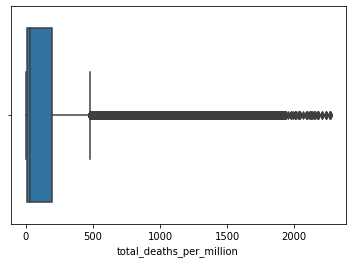

In [108]:
#QUESTION 5

sns.boxplot(x=df["total_deaths_per_million"], data=df)

In [90]:
#QUESTION 6

# MEAN: when all the values in a dataset are added and then divided by however many values there are in the dataset.
# MEDIAN: the median is the value that is in the middle of the dataset.

---
## **Instruction 3**
This part of the assignment is designed to examine COVID cases and mortality data for different countries. The countries are given by their ISO alpha-3 codes, given here: https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3 .
As in the previous task, we will be using **total_cases_per_million** and **total_deaths_per_million** columns.

**Your tasks**:

1. Write your code to find and print out the number of countries in the dataset. (**1 mark**)
2. Population mortality from seasonal influenza is generally thought to be about 0.01% (1 death per 10000 people). Write your code to find and print out the list of countries with the population mortality greater than ten times of the population mortality of seasonal influenza. (**2 marks**)
3. Write your code to find and print out the country with the highest population mortality. Both the country code and the mortality value for this country need to be printed out (**2 marks**)
4. Write your code to construct a dictionary variable ***data_large_countries*** whose keys are **iso_code**, **total_cases_per_million**, **total_deaths_per_million**, **population**, **population_density**. You can start from the original dataset **data_dict**. You can adapt the code given to you in Instruction 2. Print the dictionary. (**2 marks**)
5. Using the new dictionary ***data_large_countries***, plot a bar chart of mortality sorted in descending order of values for the countries with **population** more than 1 million, achieving first twenty places of leadership in exterminating their own population. (**3 marks**)
6. Using the same dictionary, plot a bar chart of population density for the mortality leaders. Use the same order of countries as in Task 5. (**3 marks**)
7. Discuss the bar charts. Which conclusion you can draw, if you look at all of them together? (**2 marks**)

[**Total mark: 15**]

In [91]:
#QUESTION 1

df2 = df["iso_code"].unique()
len(df2)

215

In [73]:
#QUESTION 2

df1 = df.loc[(df["total_deaths_per_million"] > 0.1)]
d = df1.groupby("iso_code").max().sort_values("total_deaths_per_million", ascending=True)

for row, index in d.iterrows():
    print(row, end=", ")

BDI, TZA, VNM, TWN, MNG, THA, BTN, ERI, FJI, PNG, CHN, SGP, NZL, BEN, BRN, BFA, UGA, NER, GIN, MUS, CIV, COD, GRD, SSD, TCD, TJK, NGA, SLE, TGO, MDG, CAF, AGO, LBR, MLI, UZB, RWA, HTI, GHA, ETH, OWID_OCE, CMR, SOM, YEM, MOZ, COG, LKA, NIC, GNB, CUB, KOR, KEN, AUS, MYS, GAB, SDN, VEN, BGD, MWI, SEN, MMR, PAK, SYR, ZMB, AFG, GMB, DJI, JPN, DZA, GNQ, OWID_AFR, VCT, ISL, OWID_ASI, QAT, MRT, TTO, ZWE, NPL, EGY, IND, PHL, NOR, MDV, BRB, IDN, ARE, FIN, LSO, STP, SYC, JAM, COM, KAZ, NAM, BWA, SAU, URY, BLR, KGZ, MAR, GUY, CYP, KWT, ATG, LCA, CPV, BHR, DOM, SUR, SLV, OMN, AZE, OWID_WRL, IRQ, LBY, TUR, GTM, DNK, HND, PSE, BHS, PRY, JOR, EST, CRI, SWZ, CAN, RUS, GRC, UKR, MCO, SRB, ISR, TUN, ALB, IRN, LBN, BLZ, MLT, ZAF, OWID_KOS, DEU, GEO, IRL, ECU, LVA, NLD, AUT, BOL, MDA, LUX, ARM, ROU, CHL, OWID_EUR, OWID_SAM, CHE, ARG, COL, POL, LTU, OWID_EUN, SWE, BRA, OWID_NAM, HRV, FRA, PAN, LIE, AND, PER, MEX, ESP, SVK, MKD, USA, BGR, PRT, BIH, ITA, HUN, MNE, GBR, SVN, BEL, CZE, SMR, 

In [42]:
#QUESTION 3

df3 = df1.groupby("iso_code").max().sort_values("total_deaths_per_million", ascending=True)
dff = df3.tail(1)

for row, index in dff.iterrows():
    print(row, index[12])

SMR 2268.843


In [92]:
#QUESTION 4

data_large_countries = pd.DataFrame({
    "iso_code" : df1["iso_code"],
    "total_cases_per_million": df1["total_cases_per_million"],
    "total_deaths_per_million": df1["total_deaths_per_million"],
    "population": df1["population"],
    "population_density": df1["population_density"]
})

data_large_countries.head()

,iso_code,total_cases_per_million,total_deaths_per_million,population,population_density
33,AFG,2.749,0.103,38928341.0,54.422
34,AFG,3.031,0.103,38928341.0,54.422
35,AFG,3.750,0.103,38928341.0,54.422
36,AFG,4.495,0.103,38928341.0,54.422
37,AFG,5.061,0.103,38928341.0,54.422


In [46]:
#WORKING OUT FOR QUESTION 5. TOP 20 COUNTRIES WITH HIGHEST MORTALITY RATE AND POPULATION MORE THAN A MILLION.
df3 = data_large_countries.loc[(data_large_countries["population"] > 1000000)]
df4 = df3.groupby("iso_code").max().sort_values("total_deaths_per_million", ascending=False)
df4.head(20)

,total_cases_per_million,total_deaths_per_million,population,population_density
iso_code,,,,
CZE,130645.284,2168.834,10708982.0,137.176
BEL,69742.000,1936.302,11589616.0,375.564
SVN,96383.143,1892.318,2078932.0,102.619
GBR,62924.753,1852.414,67886004.0,272.898
HUN,53464.937,1754.802,9660350.0,108.043
ITA,53308.709,1689.413,60461828.0,205.859
BIH,43330.697,1659.953,3280815.0,68.496
PRT,79854.898,1636.215,10196707.0,112.371
BGR,40089.113,1624.104,6948445.0,65.180


<BarContainer object of 20 artists>

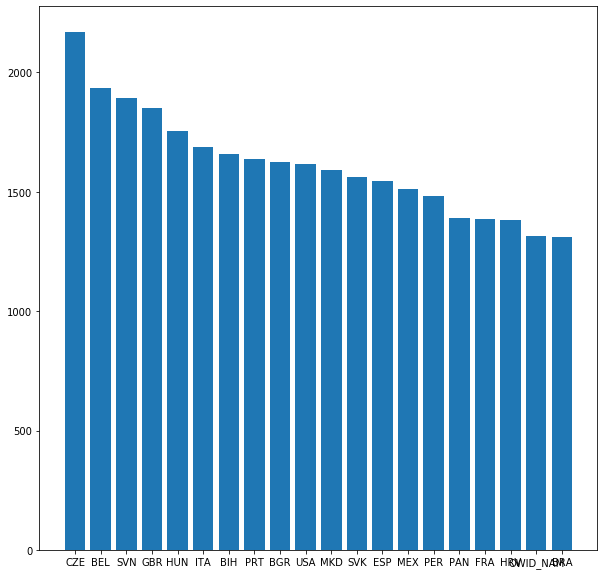

In [113]:
# QUESITON 5 

labels = ['CZE', 'BEL', 'SVN', 'GBR', 'HUN', 'ITA', 'BIH', 'PRT', 'BGR', 'USA', 'MKD', 'SVK', 'ESP', 'MEX', 'PER', 'PAN', 'FRA', 'HRV', 'OWID_NAM', 'BRA']
values = [2168.834, 1936.3020000000001, 1892.318, 1852.414, 1754.8020000000001, 1689.4129999999998, 1659.953, 1636.215, 1624.104, 1615.963, 1593.0839999999998, 1562.007, 1545.4679999999998, 1510.1670000000001, 1481.2939999999999, 1389.182, 1387.745, 1382.8570000000002, 1315.767, 1308.947]

plt.figure(figsize=(10,10))
plt.bar(labels, values)

<BarContainer object of 20 artists>

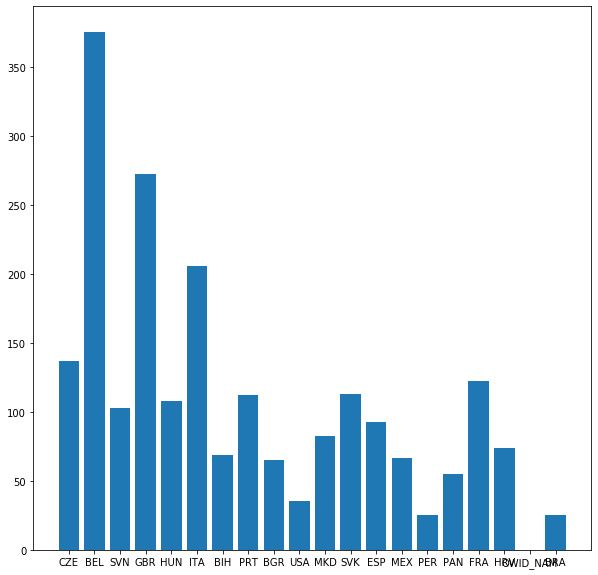

In [110]:
#QUESTION 6
labels = ['CZE', 'BEL', 'SVN', 'GBR', 'HUN', 'ITA', 'BIH', 'PRT', 'BGR', 'USA', 'MKD', 'SVK', 'ESP', 'MEX', 'PER', 'PAN', 'FRA', 'HRV', 'OWID_NAM', 'BRA']
values = [137.17600000000002, 375.564, 102.619, 272.89799999999997, 108.04299999999999, 205.859, 68.49600000000001, 112.37100000000001, 65.18, 35.608000000000004, 82.6, 113.12799999999999, 93.105, 66.444, 25.129, 55.133, 122.57799999999999, 73.726, 0, 25.04]
        

plt.figure(figsize=(10,10))
plt.bar(labels, values)

In [23]:
# 7. Discuss the bar charts. Which conclusion you can draw, if you look at all of them together? (**2 marks**)
# 

---
## **Instruction 4**
Let's now look at the other end of the COVID spread - at the countries with large populations (more than 1 million) and with the minimal number of cases and deaths. We can use the same dataset ***data_large_countries*** we have prepared in the previous task.

**Your tasks here are:**
1. Using the new dictionary ***data_large_countries***, plot bar charts of mortality per million, cases per million and population density for the 20 countries with **population** more than 1 million and minimal mortality. (**3 marks**)
2. In the bar charts you have got you should see a very clear exception. Describe its properties. What makes it exceptional? (**2 marks**)

[**Total mark: 5**]

Text(0.5, 1.0, 'Mortality per million')

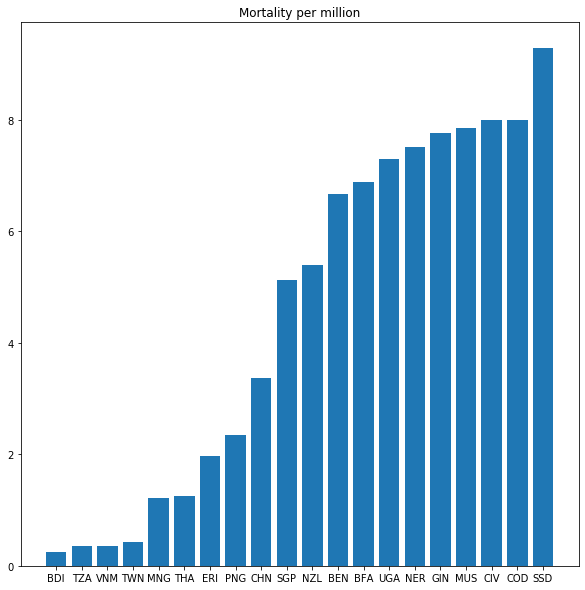

In [110]:
# 1. Using the new dictionary ***data_large_countries***, plot bar charts of mortality per million, 
# cases per million and population density for the 20 countries with **population** more than 1 
# million and minimal mortality. (**3 marks**)



df3 = data_large_countries.loc[(data_large_countries["population"] > 1000000)]
df4 = df3.groupby("iso_code").max().sort_values("total_deaths_per_million", ascending=True)
#df4.head()

countries = ["BDI", "TZA", "VNM", "TWN", "MNG", "THA", "ERI", "PNG", "CHN", "SGP", "NZL", "BEN", "BFA", "UGA", "NER", "GIN", "MUS", "CIV", "COD", "SSD"]
values = [0.252,0.35200000000000004,0.36,0.42,1.22,1.246,1.974,2.347,3.362,5.127999999999999,5.392,6.681,6.888999999999999,7.3020000000000005,7.519,7.767,7.8629999999999995,7.999,8.006,9.291]

plt.figure(figsize=(10,10))
plt.bar(countries, values)
plt.title("Mortality per million")



Text(0.5, 1.0, 'Cases per million')

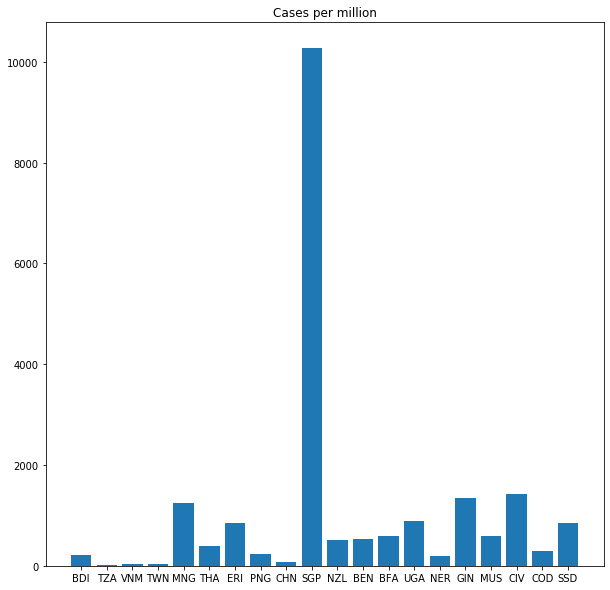

In [96]:
countries = ["BDI", "TZA", "VNM", "TWN", "MNG", "THA", "ERI", "PNG", "CHN", "SGP", "NZL", "BEN", "BFA", "UGA", "NER", "GIN", "MUS", "CIV", "COD", "SSD"]
values = [206.967, 8.521, 26.238000000000003, 41.357, 1245.4660000000001, 386.89099999999996, 856.637, 242.87400000000002, 70.434, 10273.757, 503.916, 536.245, 591.869, 887.191, 200.771, 1350.969, 583.44, 1427.425, 301.625, 847.796]

plt.figure(figsize=(10,10))
plt.bar(countries, values)
plt.title("Cases per million")


Text(0.5, 1.0, 'Population density')

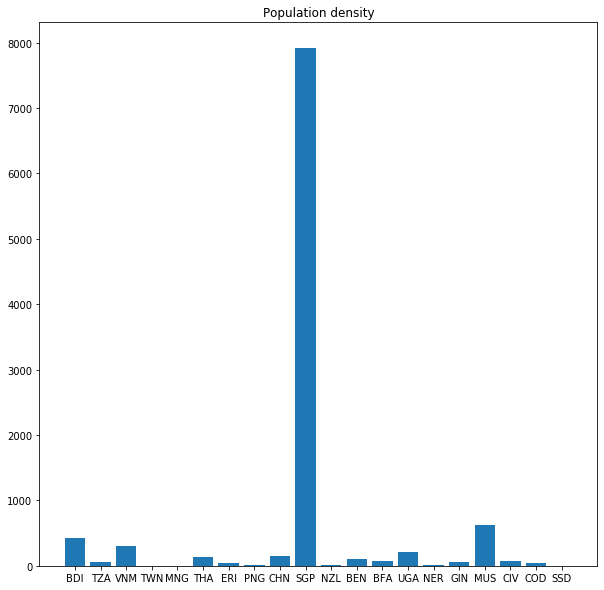

In [97]:
countries = ["BDI", "TZA", "VNM", "TWN", "MNG", "THA", "ERI", "PNG", "CHN", "SGP", "NZL", "BEN", "BFA", "UGA", "NER", "GIN", "MUS", "CIV", "COD", "SSD"]
values = [423.06199999999995, 64.699, 308.127, 0, 1.98, 135.132, 44.303999999999995, 18.22, 147.674, 7915.731, 18.206, 99.11, 70.15100000000001, 213.75900000000001, 16.955, 51.755, 622.962, 76.399, 35.879, 0]

plt.figure(figsize=(10,10))
plt.bar(countries, values)
plt.title("Population density")



#for row, index in df4.iterrows():
#    print(index[3], end=", ")

In [109]:
# 2. In the bar charts you have got you should see a very clear exception. Describe its properties. 
# What makes it exceptional? (**2 marks**)


# Singapore is the exception with population density and cases per million being extremely high compared to other nations.
# Singapore has many cases per million compared to the others due to it having a high population density, which means more close contact between people.
# The two attributes in this case are intertwined.

---
## **Instruction 5 (D/HD level)**

We will return back to the differences between the countries in their ways of dealinig with epidemics in Instruction 6. Now, however, we shall look at the basics of epidemiological processes from the point of view
of real data. Generally, epidemics evolve exponentially until they are either stopped by some measures (lockdowns, vaccinations) or saturate (population dies out and/or gets naturally immune).

**Your tasks**:

1. Define a function called **convert_date** that takes date string (in the format as it is given in the dataset csv file) as the input and returns the number of days from that date until now. The number should be negative. For example, today is 14/3/21. The input date is 3/3/21. The function should compute the difference between the input date and today's date and return -13. If the function argument is in incorrect form, the function should return 0. Don't forget to test it. (**4 marks**)
2. Pick three countries, which may be interesting or relevant for you. For me they are the UK, Ukraine and Australia (iso codes GBR, UKR, AUS). For demonstration purpose you want to include Australia or another country, which was able to deal with the COVID epidemics more or less successfully, and a country with large number of cases. Make a new list **country_list**, which contains iso codes of the countries. (**1 mark**)
3. Plot how **total_cases** for the countries you have picked, grow in time. All three curves have to be on the same plot with the horizontal axis of "Number of days before today". Don't forget the legend. (**4 marks**)
4. If you have chosen the countries appropriately, you will see that the plot you have produced is not very informative. Why is it so? What can you do to make it more informative and to reveal the true dynamics? Note there are **two** reasons, you need to provide both. (**1 mark**)
5. Implement the idea from Task 4 and make a plot, similar to task 3. (**1 mark**)
6. Explain what you see in the new plot. Do you see specific regions of interest in the epidemic curves? Discuss them. (**4 marks**)

[**Total mark: 15**]


NB: There are many more interesting dependencies you can produce in this part, and you are welcome to do so. Also, if you implement everything correctly, you don't need to limit yourself to three countries only.

In [25]:
def convert_date(y, m, d):
    y = int(input("Enter the year. "))
    m = int(input("Enter the month. "))
    d = int(input("Enter the day. "))
    
    day = datetime.date(y, m, d)
    print(day)
    
    today = datetime.date.today()
    print(today)
    
    d = day - today
    print(d.days)
    
    
convert_date(2021, 1, 1)

Enter the year. 2020
Enter the month. 1
Enter the day. 3
2020-01-03
2021-04-14
-467


In [152]:
country_list = pd.DataFrame({
    "GBR": df["iso_code"]=="GBR",
    "AUS": df["iso_code"]=="AUS",
    "UKR": df["iso_code"]=="UKR"
})


Text(0, 0.5, 'Total Cases')

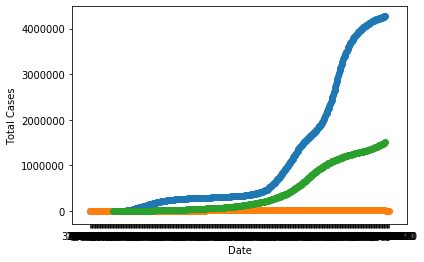

In [71]:
GBR = df.loc[(df["iso_code"] == "GBR")]
plt.scatter(x=GBR["date"], y=GBR["total_cases"])
plt.xlabel("Date")
plt.ylabel("Total Cases")


AUS = df.loc[(df["iso_code"] == "AUS")]
plt.scatter(x=AUS["date"], y=AUS["total_cases"])
plt.xlabel("Date")
plt.ylabel("Total Cases")


UKR = df.loc[(df["iso_code"] == "UKR")]
plt.scatter(x=UKR["date"], y=UKR["total_cases"])
plt.xlabel("Date")
plt.ylabel("Total Cases")

In [98]:
#There are various reasons why this graph is inaccurate. GBR's graph illustrates its total cases very well over time, but for Australia especially, the graph is too straight: it does not show when the number of cases increases accurately.
#This is due to Australia not having as much total cases as GBR and UKR.

In [ ]:
# 5. Implement the idea from Task 4 and make a plot, similar to task 3. (**4 marks**)
#
# INSERT YOUR CODE HERE


In [ ]:
# 6. Explain what you see in the new plot. Do you see specific regions of interest in the 
# epidemic curves? Discuss them. (**4 marks**)
#
# INSERT YOUR COMMENT HERE
#

---
## **Instruction 6** (D/HD level)
In this part of the assignment, we go back to the current state of affairs with COVID and look deeper into the dependencies between the parameters of the COVID epidemic and population parameters. We get back to the dataset we have created, namely **data_filtered_by_date**. This dataset also contains population parameters, for example, population and population density, median age, GDP per capita, human development index, and so on.

NOTE: If you are curious, you may want to limit the number of countries you plot by some condition (similar to what we did above by limiting countries to ones with population above 1 million. The mark will not be affected if you don't.

1. First of all, let's confirm what we saw before in Instructions 3 and 4, namely, counterintuitvely weak or no dependence of the number of cases and mortality on average population density. You need to plot two scatter plots of total mortality and total case numbers per million on population density. Take logarithm base 10 of the population density. (**2 marks**)
2. Annotate the scatter plots with the iso codes of countries. (**1 mark**)
3. Discuss the results you can see in the scatter plots. (**2 marks**) 
4. Make scatter plots of the mortality and case numbers on GDP per capita. (**2 marks**)
5. Annotate the scatter plots with the iso codes of countries. (**1 mark**)
6. Discuss what you see in these scatter plots. Strange, isn't it? What do you think are the reasons? There can be many. (**2 marks**)
7. Make and annotate scatter plot of median age vs mortality and meadian age vs log10 of gdp per capita. (**1 mark**)
8. Use numpy **polyfit** or **polynomial** function to fit a straight line in the last scatter plot (median age vs gdp per capita. Overplot the line. Note - IT CAN BE HARD! (**2 marks**)
9. Discuss the last scatter plots. (**2 marks**)

[**Total mark: 15**]

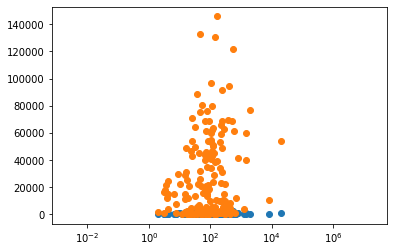

In [99]:
# 1. First of all, let's confirm what we saw before in Instructions 3 and 4, namely, 
# counterintuitvely weak or no dependence of the number of cases and mortality on average 
# population density. You need to plot two scatter plots of total mortality and total 
# case numbers per million on population density. Take logarithm base 10 of the population 
# density. (**2 marks**)
df_deaths = df.groupby("location").max().sort_values("total_deaths_per_million", ascending=True)
countries = df_deaths["iso_code"]

x = df_deaths["population_density"]
y = df_deaths["total_deaths_per_million"]
plt.xscale("log")
plt.scatter(x, y)


x1 = df_deaths["population_density"]
y1 = df_deaths["total_cases_per_million"]
plt.xscale("log")
plt.scatter(x1, y1)

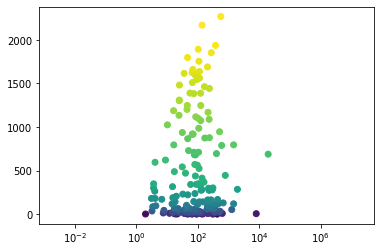

In [23]:
# 2. Annotate the scatter plots with the iso codes of countries. (**1 mark**)

colours = range(len(countries))

x = df_deaths["population_density"]
y = df_deaths["total_deaths_per_million"]
plt.xscale("log")
plt.scatter(x, y, c=colours)

In [ ]:
# 3. Discuss what you see in the scatter plots. (**2 mark**)
#
# 

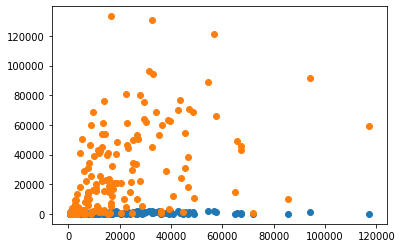

In [53]:
# 4. Make scatter plots of the mortality and case numbers on GDP per capita. (**2 marks**)
x = df_deaths["gdp_per_capita"]
y = df_deaths["total_deaths_per_million"]
plt.scatter(x, y)



x = df_deaths["gdp_per_capita"]
y = df_deaths["total_cases_per_million"]
plt.scatter(x, y)

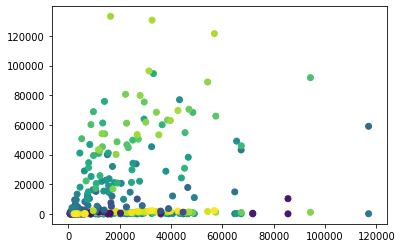

In [61]:
# 5. Annotate the scatter plots with the iso codes of countries. (**1 mark**)

x = df_deaths["gdp_per_capita"]
y = df_deaths["total_deaths_per_million"]
plt.scatter(x, y, c=colours)

x1 = df_deaths["gdp_per_capita"]
y1 = df_deaths["total_cases_per_million"]
plt.scatter(x1, y1, c=colours)

In [ ]:
# 6. Discuss what you see in these scatter plots. Strange, isn't it? What do you think are 
# the reasons? There can be many. (**2 marks**)
#
# The scatter plots do not show any correlation whatsoever.
# 


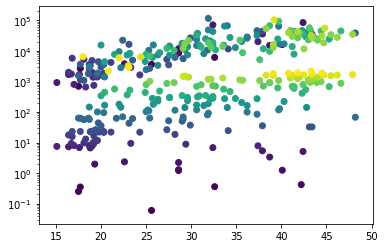

In [59]:
#7. Make and annotate scatter plot of median age vs mortality and meadian age vs log10 of gdp per capita. (1 mark)

x = df_deaths["median_age"]
y = df_deaths["total_deaths_per_million"]
plt.scatter(x, y, c=colours)



x = df_deaths["median_age"]
y = df_deaths["gdp_per_capita"]
plt.yscale("log")
plt.scatter(x, y, c=colours)
    

In [62]:
# 8. Use numpy polyfit function to fit a straight line in the last scatter plot (median age vs gdp per 
# capita. Overplot the line. (**2 marks**)
# INSERT YOUR CODE HERE


In [ ]:
# 9. Discuss the last scatter plots. (**2 marks**)
#
# INSERT YOUR COMMENT HERE
#
# 